
Call:
glm(formula = treatment ~ female + age + pim2 + pelod + p_bloodculture + 
    comorbidity + rf_pneumonia + rf_sepsis + rf_aspiration + 
    rf_transfusion + rf_trauma + rf_drowning + MODS + d2_oi, 
    family = binomial(), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6999  -0.7880  -0.5731   0.9084   2.3765  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -2.817058   0.598629  -4.706 2.53e-06 ***
female           0.370270   0.271220   1.365   0.1722    
age             -0.019715   0.031408  -0.628   0.5302    
pim2             0.008617   0.008256   1.044   0.2966    
pelod            0.018516   0.016522   1.121   0.2624    
p_bloodculture   0.575865   0.379524   1.517   0.1292    
comorbidity      0.024579   0.282889   0.087   0.9308    
rf_pneumonia     0.579308   0.478219   1.211   0.2257    
rf_sepsis       -0.755051   0.377994  -1.998   0.0458 *  
rf_aspiration   -0.201670   0.708607  -0.285  

[[1]]
[1] 0.79893

                            Stratified by treatment
                             0             1             p      test
  n                            209           127                    
  female (mean (sd))          0.44 (0.50)   0.54 (0.50)   0.067     
  age (mean (sd))             4.10 (4.82)   3.70 (4.21)   0.440     
  pim2 (mean (sd))           15.55 (20.54) 19.17 (23.00)  0.135     
  pelod (mean (sd))           9.47 (10.17) 10.82 (9.88)   0.234     
  p_bloodculture (mean (sd))  0.15 (0.36)   0.19 (0.39)   0.394     
  comorbidity (mean (sd))     0.46 (0.50)   0.57 (0.50)   0.056     
  rf_pneumonia (mean (sd))    0.79 (0.41)   0.86 (0.35)   0.141     
  rf_sepsis (mean (sd))       0.30 (0.46)   0.27 (0.44)   0.510     
  rf_aspiration (mean (sd))   0.05 (0.21)   0.03 (0.18)   0.469     
  rf_transfusion (mean (sd))  0.01 (0.10)   0.02 (0.15)   0.304     
  rf_trauma (mean (sd))       0.02 (0.14)   0.00 (0.00)   0.117     
  rf_drowning (mean (sd))     0.

Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”


Call:
matchit(formula = treatment ~ female + age + pim2 + pelod + p_bloodculture + 
    comorbidity + rf_pneumonia + rf_sepsis + rf_aspiration + 
    rf_transfusion + rf_trauma + rf_drowning + MODS, data = mydata_wth_pscore, 
    method = "nearest", distance = mydata_wth_pscore$pscore, 
    caliper = 0.01, ratio = 1)

Summary of balance for all data:
               Means Treated Means Control SD Control Mean Diff eQQ Med
distance              0.5386        0.2804     0.1747    0.2582   0.264
female                0.5433        0.4402     0.4976    0.1031   0.000
age                   3.6993        4.1000     4.8247   -0.4008   0.440
pim2                 19.1740       15.5478    20.5408    3.6262   0.900
pelod                10.8189        9.4689    10.1721    1.3500   1.000
p_bloodculture        0.1890        0.1531     0.3610    0.0359   0.000
comorbidity           0.5669        0.4593     0.4995    0.1076   0.000
rf_pneumonia          0.8583        0.7943     0.4052    0.0640   0.00

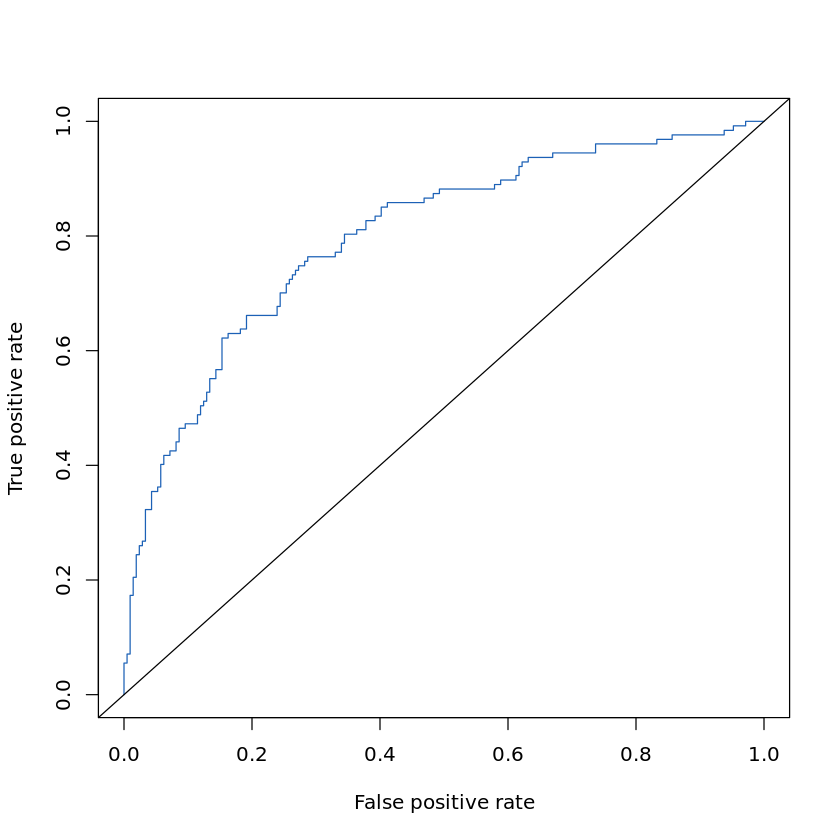

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

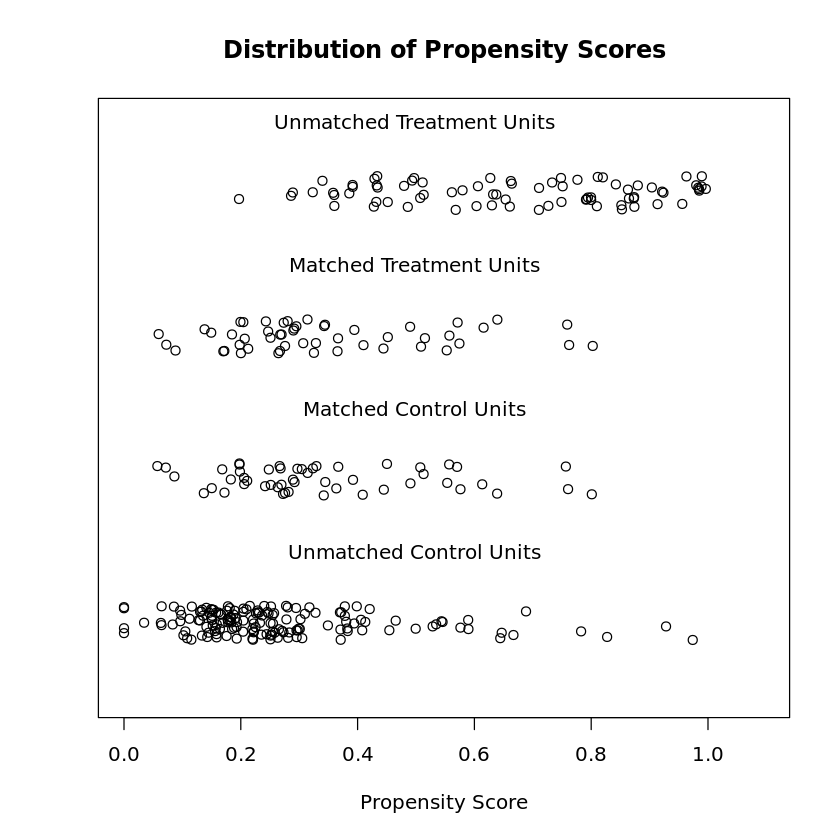

                            Stratified by treatment
                             0             1             p      test
  n                             51            51                    
  female (mean (sd))          0.51 (0.50)   0.43 (0.50)   0.432     
  age (mean (sd))             4.24 (4.92)   3.86 (4.22)   0.671     
  pim2 (mean (sd))           16.99 (22.43) 16.02 (13.92)  0.795     
  pelod (mean (sd))          10.63 (10.41)  9.61 (9.34)   0.604     
  p_bloodculture (mean (sd))  0.22 (0.42)   0.20 (0.40)   0.809     
  comorbidity (mean (sd))     0.55 (0.50)   0.45 (0.50)   0.327     
  rf_pneumonia (mean (sd))    0.84 (0.37)   0.84 (0.37)   1.000     
  rf_sepsis (mean (sd))       0.39 (0.49)   0.29 (0.46)   0.302     
  rf_aspiration (mean (sd))   0.04 (0.20)   0.06 (0.24)   0.650     
  rf_transfusion (mean (sd))  0.02 (0.14)   0.02 (0.14)   1.000     
  rf_trauma (mean (sd))       0.00 (0.00)   0.00 (0.00)   NaN       
  rf_drowning (mean (sd))     0.04 (0.20)   0.04 (0

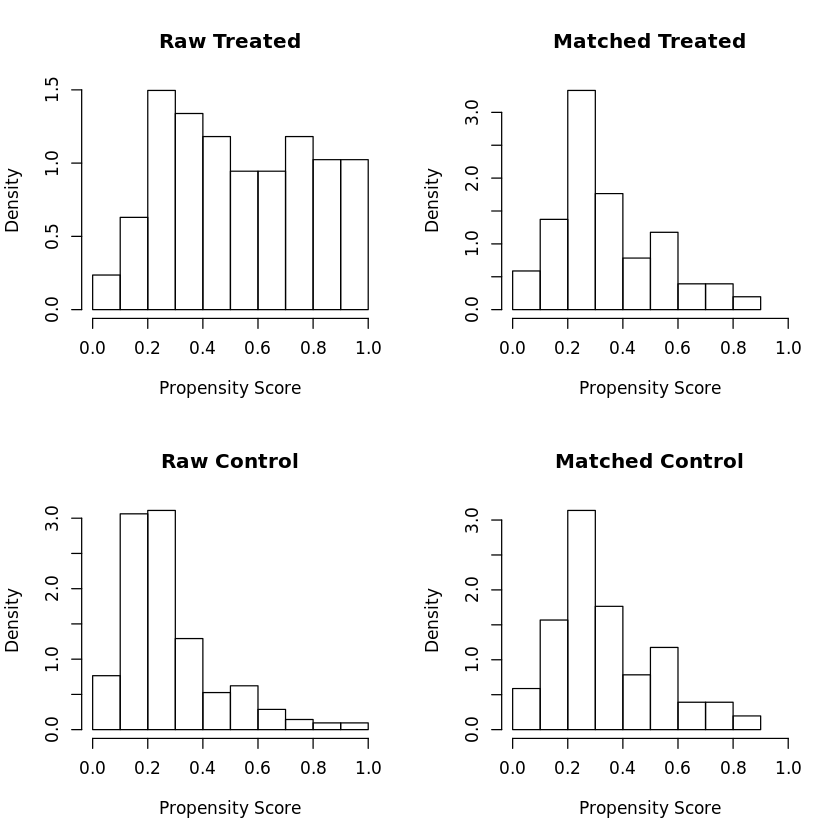

In [73]:
## Load packages and data
library(tableone)
library(MatchIt)
library(Matching)
library(pROC)
library(ROCR)
library(ggplot2)
library(epitools)
library(dplyr)
library(optmatch)
library(gtools)

####loading KKH ICU data
kkh_data <- read.csv("PICUARD_DATA_1213.csv")
df<-data.frame(kkh_data)
kkh<-df[!is.na(df$d2_oi),]
####check column names
#colnames(kkh, do.NULL = FALSE)

####select features
ID<-kkh$Study.ID
female<-as.numeric(kkh$Gender=='Female')
age<-kkh$Age
pim2<-kkh$pim2
pelod<-kkh$pelod
p_bloodculture<-as.numeric(kkh$Positive_blood_culture=='Yes')

#comorbidity
comorbidity<-kkh$comorbidity

#risk factor of ARDS
rf_pneumonia<-as.numeric(kkh$PNEUMONIA=='Checked')
rf_sepsis<-as.numeric(kkh$SEPSIS=='Checked')
rf_aspiration<-as.numeric(kkh$ASPIRATION=='Checked')
rf_transfusion<-as.numeric(kkh$TRANSFUSION=='Checked')
rf_trauma<-as.numeric(kkh$TRAUMA=='Checked')
rf_drowning<-as.numeric(kkh$DROWNING=='Checked')

#other useful features
#cardiac_failure<-as.numeric(kkh$Cardiac.failure.or.fluid.overload=='Yes')
MODS<-as.numeric(kkh$MODS=='Yes')
#Received_pulmonary_vasodilators<-as.numeric(kkh$Received_pulmonary_vasodilators=='Yes')
#blood gas labtest
#D1_FiO2<-kkh$D1_FiO2
#D1_SpO2<-kkh$D1_SpO2
d2_oi<-kkh$d2_oi
#treatment and mortality
#treatment<-kkh$hfv
treatment<-as.numeric(kkh$Received_HFV=='Yes')
died<-kkh$died_in_ICU

####new dataset
mydata<-cbind(ID,female,age,pim2,pelod,p_bloodculture,comorbidity,rf_pneumonia,rf_sepsis,rf_aspiration,rf_transfusion
              ,rf_trauma,rf_drowning,MODS,d2_oi
              ,treatment,died)

mydata<-data.frame(mydata)
xvars<-c("female","age","pim2","pelod","p_bloodculture","comorbidity","rf_pneumonia"
         ,"rf_sepsis","rf_aspiration" , "rf_transfusion", "rf_trauma", "rf_drowning","MODS","d2_oi"
         )
#mydata_noNA <- na.omit(mydata)
#fit a propensity score model with logistic regression
psmodel <-glm(treatment~female+age+pim2+pelod+p_bloodculture+comorbidity+rf_pneumonia+rf_sepsis
                 +rf_aspiration+rf_transfusion+rf_trauma+rf_drowning+MODS+d2_oi
                 , data = mydata,family=binomial())
#show coefficients etc
summary(psmodel)

#create propensity score
pscore<-psmodel$fitted.values
#pscore<-fitted(psmodel) 

label<-mydata$treatment
perf<- ROCR::prediction(pscore, label)
psm_auc<-ROCR::performance(ROCR::prediction(pscore, label), "auc")@y.values[1]
print(psm_auc)
roc.perf = performance(perf, measure = "tpr", x.measure = "fpr")
plot(roc.perf,col="#1c61b6",percent=TRUE)
abline(a=0, b= 1)

#########################################
#look at a table 1
#mydata before matching
table1_unmatched<- CreateTableOne(vars=xvars, strata="treatment", data = mydata)
## include standardized mean difference (SMD)
print(table1_unmatched, smd=FALSE)


#colnames(kkh, do.NULL = TRUE, prefix = "col")
##########################################
## Using the Matchit for propensity score, nearest neighbor matching
mydata_wth_pscore<-data.frame(cbind(mydata,pscore))

m.out <- matchit(treatment~female+age+pim2+pelod+p_bloodculture+comorbidity+rf_pneumonia+rf_sepsis
                 +rf_aspiration+rf_transfusion+rf_trauma+rf_drowning+MODS, data = mydata_wth_pscore,              
                 method = "nearest", distance=mydata_wth_pscore$pscore,caliper=0.01,ratio=1)
summary(m.out)

#propensity score plots
plot(m.out, type="jitter")
plot(m.out, type="hist")
########################################
#use the Matching package
#do greedy matching on propensity score
#psmatch<-Match(Tr=mydata$treatment,M=1, X=pscore,replace=FALSE,caliper=0.2)
#matched<-mydata[unlist(psmatch[c("index.treated","index.control")]),]
#summary(matched)
########################################
#look at Table1 after matching

#Matching Table1
#matchedtab<-CreateTableOne(vars=xvars, strata="treatment",data=matched)
#print(matchedtab, smd=TRUE)

#MatchIt Table1
table1_matched<- CreateTableOne(vars=xvars, strata="treatment", data = match.data(m.out, "all"))
## include standardized mean difference (SMD)
print(table1_matched, smd=FALSE)


p_score,treatment_1
0.20023904,1
0.76220858,1
0.39161592,1
0.08819948,1
0.39141063,1
0.29146446,1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


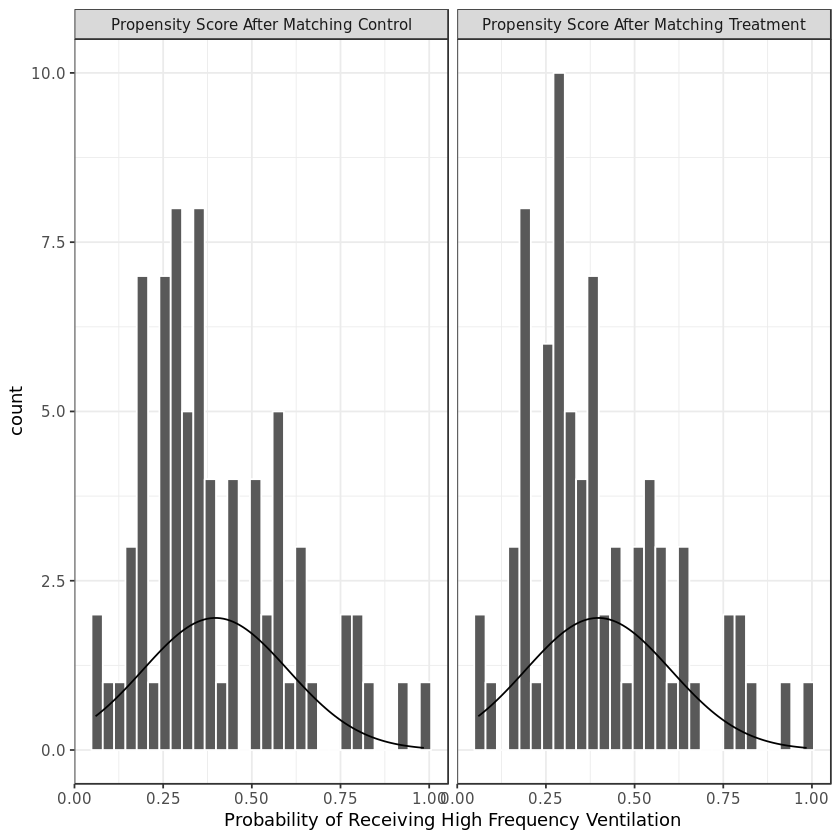

In [5]:
############################################
#checking balance using pscore plots

#using Matching package
#matched_treated<-mydata_wth_pscore[mydata_wth_pscore$ID %in% matched$ID[matched$treatment==1],]['pscore'][,1]
#matched_control<-mydata_wth_pscore[mydata_wth_pscore$ID %in% matched$ID[matched$treatment==0],]['pscore'][,1]

#using MatchIt package
matched_treated<-mydata_wth_pscore[mydata_wth_pscore$ID %in% match.data(m.out, "all")$ID[match.data(m.out, "all")$treatment==1],]['pscore'][,1]
matched_control<-mydata_wth_pscore[mydata_wth_pscore$ID %in% match.data(m.out, "all")$ID[match.data(m.out, "all")$treatment==0],]['pscore'][,1]

pscore_outcome<-rbind(cbind(p_score=matched_treated,treatment_1=1),cbind(p_score=matched_control,treatment_1=0))
prs_df<-data.frame(pscore_outcome)
head(prs_df)
###############################################
#checking balance after matching by ploting the pscore

#dataframe = data.frame(x = matched_treated, x2 = matched_control)
#g = ggplot(dataframe, aes(x)) + geom_histogram( aes(x = x, y = ..density..),binwidth = diff(range(dataframe$x))/30, fill="skyblue") + geom_histogram( aes(x = x2, y = -..density..), binwidth = diff(range(dataframe$x))/30, fill= "lightgreen")
#print(g)

##use histogram
#hist(matched_treated,breaks=12,ylim=c(0,40),col='skyblue',border=F,xlab="Propensity Score", main="Propensity Score After Matching")
#hist(matched_control,add=T,col=scales::alpha('red',.5),border=F)
#x_trt<-seq(min(matched_treated),max(matched_treated),length=length(matched_treated))
#y_trt<-dnorm(x_trt,mean=mean(matched_treated),sd=sd(matched_treated)) 
#y_trt <- y_trt*diff(h$mids[1:2])*length(matched_treated)
#lines(x_trt, y_trt, col="blue", lwd=1)
#x_con<-seq(min(matched_control),max(matched_control),length=length(matched_control))
#y_con<-dnorm(x_con,mean=mean(matched_control),sd=sd(matched_control)) 
#y_con <- y_con*diff(h$mids[1:2])*length(matched_control)
#lines(x_con, y_con, col="red", lwd=1)

# Simulate some data. Individuals' heights in cm.
n        <- length(matched_treated)
mean     <- mean(matched_treated)
sd       <- sd(matched_treated)
binwidth <- 2
height <- rnorm(n, mean, sd)

labs <- paste("Propensity Score After Matching", c("Control", "Treatment"))
prs_df %>%
  mutate(treatment_1 = ifelse(treatment_1 == 1, labs[1], labs[2]))%>%
  ggplot(aes(x = p_score)) +
  geom_histogram(color = "white") +
  facet_wrap(~treatment_1) +
  xlab("Probability of Receiving High Frequency Ventilation") +
  theme_bw()+
stat_function(fun = dnorm, args = list(mean = mean, sd = sd))

In [59]:
###################################
#outcome analysis
#Matching package
#y_treatment<-matched1$died[matched$treatment==1]
#y_control<-matched1$died[matched$treatment==0]

#MatchIt package
y_treatment<-match.data(m.out)$died[match.data(m.out, "all")$treatment==1] 
y_control<-match.data(m.out)$died[match.data(m.out, "all")$treatment==0] 



#pairwise difference for continuous data
#diffy<-y_trt-y_con
#paired t-test
#t.test(diffy)

table(y_treatment,y_control)
#McNemar test
mcnemar.test(y_treatment, y_control)

########## calculate Odd's ratio here!
a<-length(y_treatment[y_treatment==1])
b<-length(y_control[y_control==1])
c<-length(y_treatment[y_treatment==0])
d<-length(y_control[y_control==0])

oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2))


           y_control
y_treatment  0  1
          0 30 11
          1  7  3


	McNemar's Chi-squared test with continuity correction

data:  y_treatment and y_control
McNemar's chi-squared = 0.5, df = 1, p-value = 0.4795


,Disease1,Disease2,Total
Exposed1,10,41,51
Exposed2,14,37,51
Total,24,78,102
,estimate,lower,upper
Exposed1,1.0000000,NA,NA
Exposed2,0.6497013,0.2489449,1.64334
,midp.exact,fisher.exact,chi.square
Exposed1,NA,NA,NA
Exposed2,0.3635921,0.4843023,0.3504589


In [22]:
##############################################

m.out <- matchit(treatment~female+age+pim2+pelod+p_bloodculture+comorbidity+rf_pneumonia+rf_sepsis
                 +rf_aspiration+rf_transfusion+rf_trauma+rf_drowning+MODS, data = mydata, 
                 method = "nearest", distance=mydata_wth_pscore$pscore,caliper=0.1)

#psmatch<-Match(Tr=mydata$treatment,M=1, X=pscore,replace=FALSE,caliper=0.01)
#matched<-mydata[unlist(psmatch[c("index.treated","index.control")]),]

#MatchIt package
y_treatment<-match.data(m.out)$died[match.data(m.out, "all")$treatment==1] 
y_control<-match.data(m.out)$died[match.data(m.out, "all")$treatment==0] 

#Matching package
#y_treatment<-matched$died[matched$treatment==1]
#y_control<-matched$died[matched$treatment==0]

a<-length(y_treatment[y_treatment==1])
b<-length(y_control[y_control==1])
c<-length(y_treatment[y_treatment==0])
d<-length(y_control[y_control==0])

oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2))




Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

,Disease1,Disease2,Total
Exposed1,26,60,86
Exposed2,37,49,86
Total,63,109,172
,estimate,lower,upper
Exposed1,1.0000000,NA,NA
Exposed2,0.5765563,0.3046182,1.078876
,midp.exact,fisher.exact,chi.square
Exposed1,NA,NA,NA
Exposed2,0.08515071,0.1131678,0.08170142


In [81]:
############################################

calipers<-c(0.001,0.02,0.04,0.06,0.08,0.1)
odds<-c()
ci5<-c()
ci95<-c()
p_value<-c()

for(i in 1:10){
    
    m.out <- matchit(treatment~female+age+pim2+pelod+p_bloodculture+comorbidity+rf_pneumonia+rf_sepsis
                 +rf_aspiration+rf_transfusion+rf_trauma+rf_drowning+MODS, data = mydata_wth_pscore, 
                 method = "nearest", distance=mydata_wth_pscore$pscore,caliper=0.005,ratio=1)

    #Matching package
    y_treatment<-match.data(m.out)$died[match.data(m.out, "all")$treatment==1] 
    y_control<-match.data(m.out)$died[match.data(m.out, "all")$treatment==0] 


    a<-length(y_treatment[y_treatment==1])
    b<-length(y_control[y_control==1])
    c<-length(y_treatment[y_treatment==0])
    d<-length(y_control[y_control==0])

    odds<-c(odds,oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2),verbose = FALSE)$measure[2,1])
    ci5<-c(ci5,oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2),verbose = FALSE)$measure[2,2])
    ci95<-c(ci95,oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2),verbose = FALSE)$measure[2,3])
    p_value<-c(p_value,oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2),verbose = FALSE)$p.value[2,1])
    

    
}

outcome_table<-cbind(calipers,odds,ci5,ci95,p_value)
outcome_table


#exp(cbind(Odds_and_OR=coef(psmodel), confint(psmodel)))

Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”Warning message in if (distance %in% c("

calipers,odds,ci5,ci95,p_value
0.001,0.7894663,0.2935098,2.092676,0.6343793
0.020,1.1361642,0.4104365,3.175676,0.8051732
0.040,0.9999999,0.3655471,2.735626,1.0000000
0.060,0.9999999,0.3655471,2.735626,1.0000000
0.080,0.8861219,0.3269894,2.382498,0.8100154
0.100,1.1361642,0.4104365,3.175676,0.8051732
0.001,1.1361642,0.4104365,3.175676,0.8051732
0.020,1.3018205,0.4634189,3.738609,0.6165314
0.040,0.8861219,0.3269894,2.382498,0.8100154
0.060,0.8861219,0.3269894,2.382498,0.8100154


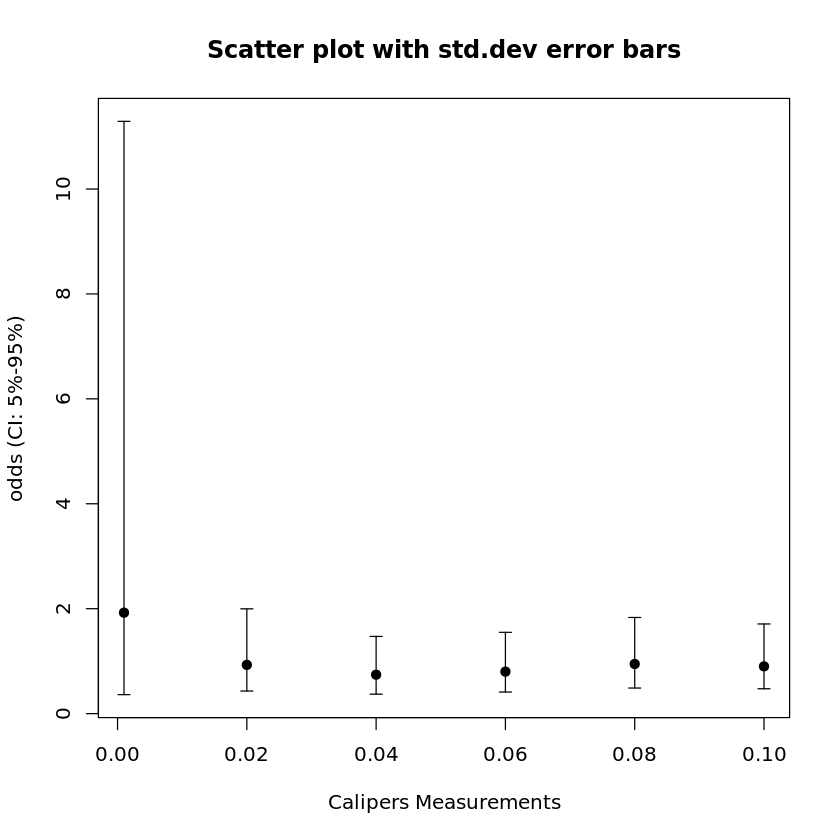

In [52]:
plot(calipers, odds,
    ylim=range(c(ci5, ci95)),
    pch=19, xlab="Calipers Measurements", ylab="odds (CI: 5%-95%)",
    main="Scatter plot with std.dev error bars"
)
# hack: we draw arrows but with very special "arrowheads"
arrows(calipers, ci5, calipers, ci95, length=0.05, angle=90, code=3)

In [75]:
mydata_wth_pscore$pscore

[1] 3.420586e-01 1.826590e-01 2.631939e-01 6.036212e-01 2.058203e-01
  [6] 2.002390e-01 1.977137e-01 7.622086e-01 6.442643e-02 1.367250e-01
 [11] 6.133860e-01 2.516905e-01 9.198950e-08 1.559087e-01 9.833634e-01
 [16] 1.161942e-01 1.816163e-01 3.916159e-01 2.258895e-01 5.071956e-01
 [21] 2.803240e-01 1.411662e-01 1.780097e-01 1.460086e-01 1.301187e-01
 [26] 1.425450e-01 8.819948e-02 3.914106e-01 9.214157e-01 5.712755e-02
 [31] 2.914645e-01 1.681763e-01 3.857871e-01 4.320017e-01 7.243579e-02
 [36] 4.904571e-01 3.719015e-01 1.447530e-01 7.764499e-01 3.599590e-01
 [41] 3.697572e-01 4.207121e-01 2.893675e-01 2.220348e-01 3.439624e-02
 [46] 2.781161e-01 9.738743e-01 3.231987e-01 4.131354e-01 1.081501e-01
 [51] 2.221429e-01 1.493340e-01 4.078859e-01 1.910000e-01 3.781690e-01
 [56] 2.109364e-01 8.336073e-02 9.609681e-02 5.703364e-01 7.604122e-01
 [61] 3.278720e-01 8.272647e-01 2.956899e-01 5.760884e-01 3.781334e-01
 [66] 4.517748e-01 1.642315e-01 7.104913e-01 5.436689e-01 7.159104e-02
 [71] 1.503220e-01 7.482696e-01 2.730375e-01 2.632825e-01 4.449130e-01
 [76] 2.154212e-01 4.795917e-01 9.635744e-02 7.566112e-01 2.095905e-01
 [81] 2.199278e-01 6.467475e-01 3.010156e-01 3.635714e-01 2.665208e-01
 [86] 1.701374e-01 1.785735e-01 2.511382e-01 8.551111e-02 1.829244e-01
 [91] 1.874485e-01 2.758019e-01 2.507082e-01 8.422323e-01 2.545237e-01
 [96] 5.130017e-01 4.278436e-01 1.980674e-01 2.951556e-01 2.860512e-01
[101] 7.330844e-01 2.697935e-01 6.884224e-01 9.559605e-01 9.894776e-01
[106] 1.571236e-01 1.017826e-01 9.817145e-02 8.199679e-01 9.798276e-01
[111] 3.141671e-01 6.423291e-02 1.339645e-01 2.900599e-01 1.122183e-01
[116] 6.389329e-01 4.503057e-01 1.047206e-07 1.576916e-01 9.281641e-01
[121] 8.629469e-01 1.848958e-01 4.859672e-01 4.342907e-01 5.893654e-01
[126] 1.969638e-01 5.131153e-01 8.516288e-01 9.846635e-01 6.300113e-01
[131] 3.051862e-01 1.278467e-01 1.823850e-01 1.380076e-01 2.224135e-01
[136] 2.972143e-01 1.585344e-01 6.318354e-02 1.586241e-01 2.045422e-01
[141] 2.644324e-01 1.851091e-01 1.519609e-01 7.910930e-01 9.962794e-01
[146] 5.085965e-01 3.664978e-01 3.601906e-01 6.393313e-01 2.671283e-01
[151] 9.889405e-01 1.507295e-01 7.997428e-01 1.050192e-01 4.335831e-01
[156] 2.126561e-01 5.285212e-01 7.999234e-01 8.739744e-01 3.294653e-01
[161] 4.933867e-01 2.441652e-01 2.067349e-01 1.994266e-01 7.589327e-01
[166] 7.106854e-01 5.113395e-01 4.328015e-01 1.720192e-01 2.573741e-07
[171] 1.494076e-01 2.039352e-01 2.545937e-01 6.375050e-01 2.429695e-01
[176] 6.640401e-01 3.398180e-01 3.286214e-01 3.068680e-01 2.289624e-01
[181] 4.899178e-01 2.757403e-01 1.763808e-01 2.840386e-07 4.967972e-01
[186] 8.097148e-01 3.234875e-01 8.112678e-01 3.022071e-01 6.157593e-01
[191] 2.580104e-01 4.100686e-01 4.087942e-01 1.409862e-01 9.630650e-01
[196] 5.743688e-01 3.706307e-01 2.695841e-01 2.513214e-01 2.707785e-01
[201] 3.823835e-01 5.572131e-01 1.616307e-01 1.302383e-01 2.891274e-01
[206] 8.026535e-01 6.606645e-01 3.252571e-01 2.569319e-01 2.046288e-01
[211] 2.311813e-01 1.324565e-01 1.655064e-01 3.830466e-01 3.804496e-01
[216] 1.334319e-01 1.934893e-01 4.058264e-01 2.480074e-01 3.045272e-01
[221] 2.508368e-01 6.320677e-01 8.647189e-01 4.516323e-01 2.043223e-01
[226] 1.838771e-01 2.252482e-01 6.668722e-01 8.010602e-01 2.969427e-01
[231] 1.927448e-01 2.919754e-01 2.551277e-01 5.344912e-01 2.401218e-01
[236] 1.756973e-01 4.652520e-01 5.455046e-01 3.491436e-01 6.442917e-01
[241] 3.097093e-01 5.534900e-01 4.994680e-01 1.772557e-01 6.535221e-01
[246] 8.526128e-01 2.208991e-01 2.818169e-01 7.827162e-01 3.710584e-01
[251] 5.680218e-01 5.526104e-01 4.442802e-01 3.446445e-01 5.898040e-01
[256] 3.985976e-01 8.734928e-01 1.930202e-01 5.712657e-01 1.977133e-01
[261] 1.717930e-01 3.441615e-01 2.675473e-01 5.937575e-02 9.038886e-01
[266] 1.532506e-01 1.688761e-01 1.894698e-01 2.043627e-01 2.415982e-01
[271] 2.289390e-01 2.353307e-01 2.328048e-01 1.781327e-01 3.656100e-01
[276] 2.475312e-01 2.945874e-01 1.810513e-01 3.581370e-01 9.850471e-01
[281] 2.509179e-01 2.83016